In [1]:
from rlmodule import *
import matplotlib.pyplot as plt

In [2]:
#initialise important parameters
q = np.ones([4,70])
w = np.ones(70)
gamma = 1

In [3]:
#for first 2000 rounds of training
alpha = 0.001
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_episode(q,w,alpha,gamma)
  tot_episodes += 100

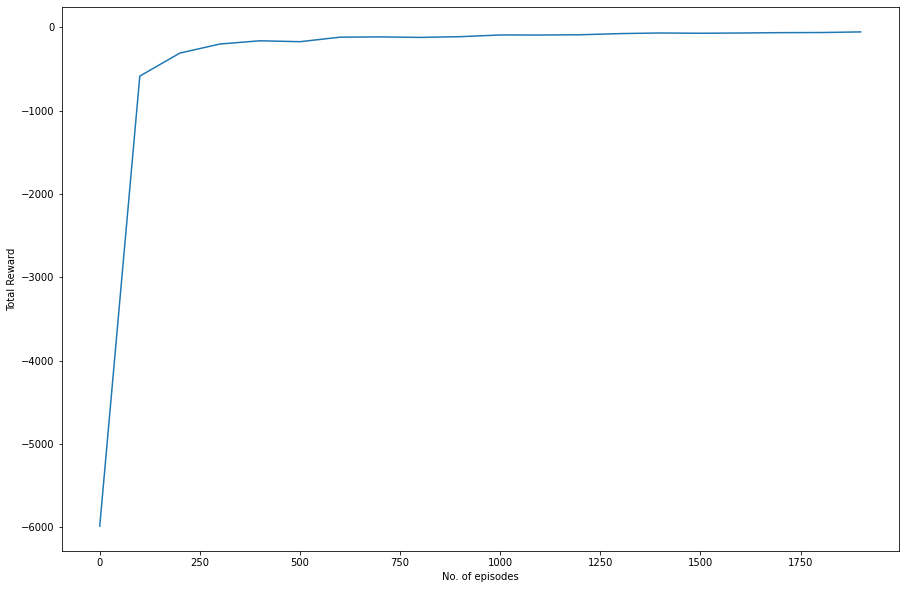

In [4]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [5]:
#we will now update values of alpha and train again for 2000 steps
alpha = 0.1
#let us draw the convergence plot
reward_tot = []
no_episodes = []
tot_episodes = 0
N = 150
for i in range(20):
  rew = 0
  for j in range(N):
    steps,rew_temp = run_episode_dont_update(q,w)
    rew += rew_temp
  rew_avg = rew/N
  reward_tot.append(rew_avg)
  no_episodes.append(tot_episodes)
  #now we will train the model for 100 episodes with updates
  for j in range(100):
    a, b = run_episode(q,w,alpha,gamma)
  tot_episodes += 100

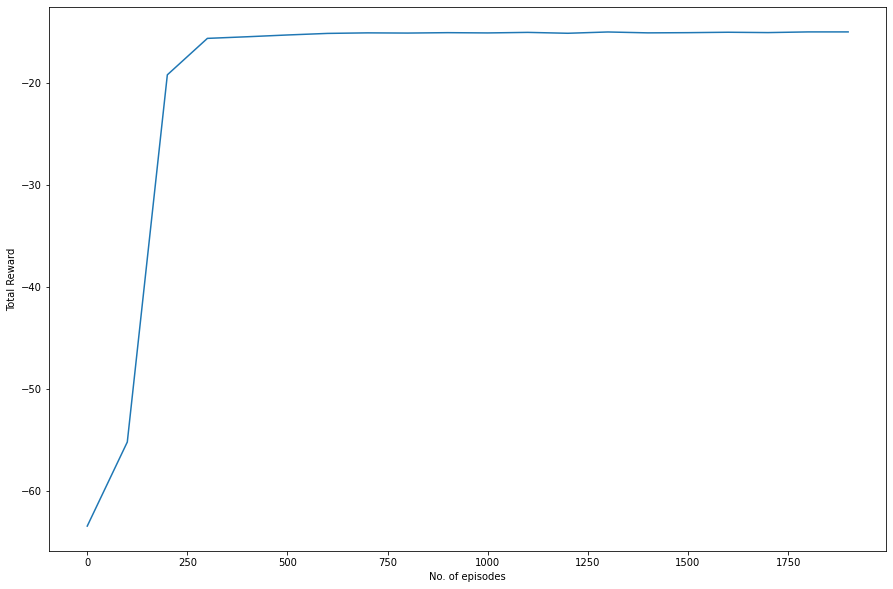

In [6]:
#let us plot the results
plt.figure(figsize=(15,10))
plt.plot(no_episodes,reward_tot)
plt.xlabel("No. of episodes")
plt.ylabel("Total Reward")
plt.show()

In [8]:
#we want to write a function that will give a count of each trajectory
times_visited = np.zeros([7,10])
#we will sample 50 trajectories and keep a count of each state visited
no_steps = []
Tot_steps = 0
for t in range(50):
  state = env.reset()
  times_visited[3][0] += 1
  no_steps_this_loop = 0
  is_done = False
  while is_done == False:
    action = sample_action(state,q)
    new_state, reward, is_done, _ = env.step(action)
    state = new_state
    a,b = divmod(state,10)
    times_visited[a][b] += 1
    no_steps_this_loop +=1
    Tot_steps += 1
  no_steps.append(no_steps_this_loop)

In [9]:
av_steps = Tot_steps/50
print(av_steps)

15.02


In [10]:
times_visited

array([[ 0.,  0.,  0.,  0.,  0.,  0., 50., 50., 50., 51.],
       [ 0.,  0.,  0.,  0.,  0., 50.,  0.,  0.,  0., 50.],
       [ 0.,  0.,  0.,  0., 50.,  0.,  0.,  0.,  0., 50.],
       [50., 50., 50., 50.,  0.,  0.,  0., 50.,  0., 50.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 50., 50.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.]])

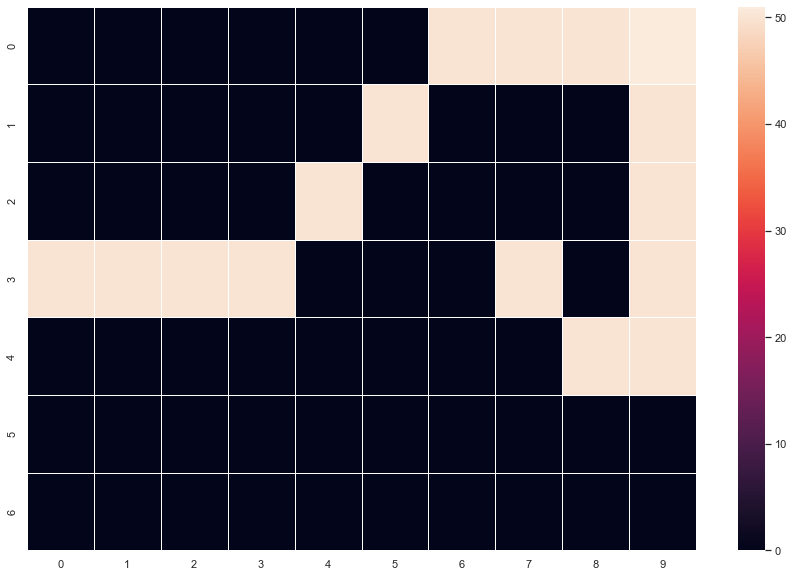

In [11]:
import seaborn as sns
sns.set(rc = {'figure.figsize':(15,10)})
ax = sns.heatmap(times_visited,linewidth = 0.5)

In [12]:
#let us try to plot the value function for the grid
value_grid = np.zeros(times_visited.shape)
for i in range(7):
  for j in range(10):
    s = i*10 +j
    value_grid[i][j] = v(w,s)
df = pd.DataFrame(value_grid)

In [13]:
df

,0,1,2,3,4,5,6,7,8,9
0,-19.553376,-19.714710,-19.732056,-19.828596,-15.535422,-9.293537,-8.001564,-7.098941,-6.034438e+00,-5.077484
1,-20.236245,-19.710354,-18.949206,-21.083078,-11.280885,-9.000478,-8.755659,-7.366281,-6.660731e+00,-4.077484
2,-20.593146,-19.235280,-16.063628,-13.912747,-10.000992,-10.378590,-8.955230,-5.838236,-6.668496e+00,-3.000000
3,-14.016553,-13.009972,-12.005344,-11.002489,-12.444648,-11.231688,-8.839192,1.000000,-5.468549e+00,-2.000000
4,-19.890917,-18.625567,-15.995215,-14.492159,-13.599411,-10.352183,1.000000,-2.359786,-2.317974e-59,-1.000000
5,-19.027885,-18.103703,-16.946451,-15.646248,-11.929816,1.000000,1.000000,-0.206985,-2.727518e+00,-3.157819
6,-18.220487,-17.113959,-15.067390,-13.483651,1.000000,1.000000,1.000000,1.000000,-1.042261e+00,-2.200955


In [16]:
#let us plot the probabilities corresponding to the four actions
prob_grid = np.zeros([7,10,4])
for k in range(4):
    for i in range(7):
        for j in range(10):
            s = i*10 + j
            a = policy(s,q)
            prob_grid[i][j][k]=a[k] 

In [44]:
df_up = pd.DataFrame(prob_grid[:,:,0])
df_right = pd.DataFrame(prob_grid[:,:,1])
df_down = pd.DataFrame(prob_grid[:,:,2])
df_left = pd.DataFrame(prob_grid[:,:,3])

In [45]:
df_right

,0,1,2,3,4,5,6,7,8,9
0,0.384309,0.199681,0.012700,0.181131,0.869010,0.946229,0.998149,0.997303,0.993263,0.001289
1,0.490429,0.727866,0.023242,0.090328,0.906084,0.997951,0.875680,0.835661,0.205912,0.001397
2,0.620646,0.789906,0.444313,0.953639,0.999397,0.912290,0.853483,0.226562,0.432134,0.000488
3,0.998939,0.999545,0.999528,0.999284,0.897627,0.830765,0.831103,0.250000,0.121306,0.000851
4,0.583226,0.713999,0.920322,0.844296,0.813720,0.913094,0.250000,0.020941,0.000168,0.000979
5,0.252089,0.731705,0.397897,0.425304,0.927395,0.250000,0.250000,0.228156,0.161362,0.109266
6,0.459153,0.807555,0.955031,0.922614,0.250000,0.250000,0.250000,0.250000,0.142064,0.207717


In [46]:
df_up

,0,1,2,3,4,5,6,7,8,9
0,0.104366,0.134175,0.028861,0.090808,0.050762,0.016885,0.000895,0.001130,0.003068,0.001405
1,0.135984,0.052886,0.010334,0.183614,0.018607,0.000857,0.053019,0.072111,0.092378,0.000598
2,0.174390,0.059260,0.018800,0.002531,0.000112,0.016016,0.030531,0.040805,0.068070,0.000250
3,0.000278,0.000071,0.000073,0.000030,0.014479,0.019651,0.055493,0.250000,0.083120,0.000357
4,0.037353,0.031874,0.010259,0.039296,0.004105,0.004822,0.250000,0.073066,0.000140,0.000774
5,0.041283,0.070708,0.034645,0.182414,0.007964,0.250000,0.250000,0.224811,0.072293,0.116326
6,0.080143,0.059935,0.015390,0.022033,0.250000,0.250000,0.250000,0.250000,0.205322,0.078575


In [47]:
df_down

,0,1,2,3,4,5,6,7,8,9
0,0.243407,0.532022,0.850375,0.095383,0.035415,0.015997,0.000560,0.000908,0.002203,0.996746
1,0.200394,0.108748,0.944948,0.550909,0.059973,0.001082,0.035112,0.067516,0.648335,0.997299
2,0.087635,0.110502,0.507954,0.038002,0.000428,0.059673,0.090067,0.628889,0.320116,0.999147
3,0.000460,0.000226,0.000230,0.000582,0.075888,0.128634,0.049093,0.250000,0.319319,0.998411
4,0.308796,0.225110,0.041337,0.088039,0.173818,0.065034,0.250000,0.851133,0.000700,0.000495
5,0.628145,0.164187,0.539648,0.340711,0.047787,0.250000,0.250000,0.240864,0.143191,0.488867
6,0.167420,0.075201,0.015419,0.040586,0.250000,0.250000,0.250000,0.250000,0.317733,0.215346


In [48]:
df_left

,0,1,2,3,4,5,6,7,8,9
0,0.267918,0.134122,0.108065,0.632678,0.044813,0.020890,0.000396,0.000659,0.001465,0.000560
1,0.173193,0.110500,0.021477,0.175148,0.015337,0.000109,0.036188,0.024713,0.053375,0.000706
2,0.117329,0.040332,0.028933,0.005828,0.000063,0.012020,0.025919,0.103745,0.179680,0.000114
3,0.000324,0.000157,0.000170,0.000104,0.012005,0.020950,0.064312,0.250000,0.476255,0.000380
4,0.070626,0.029017,0.028081,0.028369,0.008357,0.017050,0.250000,0.054860,0.998992,0.997752
5,0.078483,0.033399,0.027810,0.051571,0.016854,0.250000,0.250000,0.306169,0.623154,0.285541
6,0.293285,0.057308,0.014160,0.014767,0.250000,0.250000,0.250000,0.250000,0.334881,0.498363


In [49]:
q_val =pd.DataFrame(q)

In [50]:
q_val

,0,1,2,3,4,5,6,7,8,9,...,60,61,62,63,64,65,66,67,68,69
0,0.226712,0.556321,0.029357,0.329793,0.411112,-0.046239,-0.433538,-0.506242,-0.177406,-0.389317,...,0.055097,0.304291,-0.011632,0.013635,1.0,1.0,1.0,1.0,0.860619,0.043100
1,1.530254,0.953897,-0.791517,1.020263,3.251322,3.979845,6.583741,6.276599,5.602472,-0.475887,...,1.800674,2.905038,4.116366,3.748320,1.0,1.0,1.0,1.0,0.492315,1.015227
2,1.073544,1.933859,3.412553,0.378941,0.051105,-0.100220,-0.901506,-0.724456,-0.508505,6.174934,...,0.791793,0.531196,-0.009808,0.624531,1.0,1.0,1.0,1.0,1.297252,1.051294
3,1.169490,0.555923,1.349607,2.271004,0.286460,0.166614,-1.248698,-1.045901,-0.916561,-1.309730,...,1.352436,0.259474,-0.094926,-0.386486,1.0,1.0,1.0,1.0,1.349815,1.890379
